# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nemuro
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | papao
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | chocznia
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | labrador city
Processing Record 10 of Set 1 | kifri
Processing Record 11 of Set 1 | novyy urgal
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | quesada
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | st. john's
Processing Record 22 of Set 1 | stung tren

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nemuro,43.3236,145.5750,15.17,93,97,6.03,JP,1723833697
1,thompson,55.7435,-97.8558,20.09,52,40,4.12,CA,1723833698
2,papao,-17.7500,-149.5500,25.82,88,100,11.92,PF,1723833699
3,waitangi,-43.9535,-176.5597,9.34,85,100,4.02,NZ,1723833700
4,lihue,21.9789,-159.3672,26.77,80,40,5.66,US,1723833586


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nemuro,43.3236,145.5750,15.17,93,97,6.03,JP,1723833697
1,thompson,55.7435,-97.8558,20.09,52,40,4.12,CA,1723833698
2,papao,-17.7500,-149.5500,25.82,88,100,11.92,PF,1723833699
3,waitangi,-43.9535,-176.5597,9.34,85,100,4.02,NZ,1723833700
4,lihue,21.9789,-159.3672,26.77,80,40,5.66,US,1723833586


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

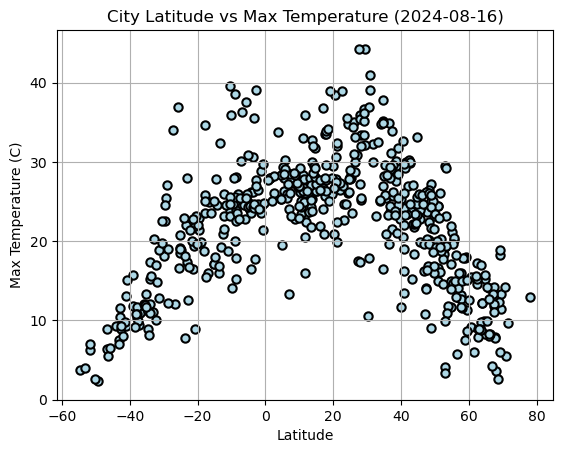

In [36]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]

plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(0,)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (2024-08-16)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

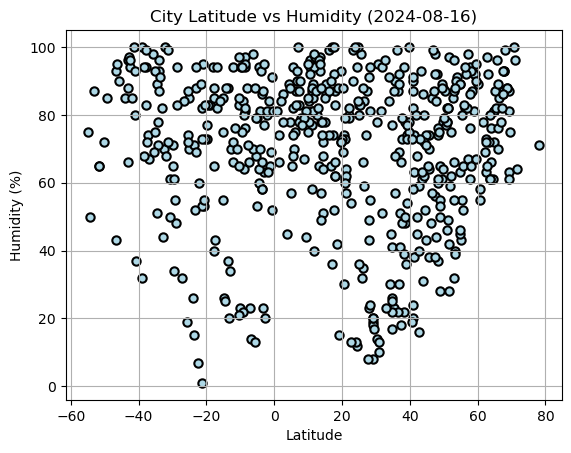

In [38]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='lightblue', edgecolors="black", linewidths=1.5)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2024-08-16)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

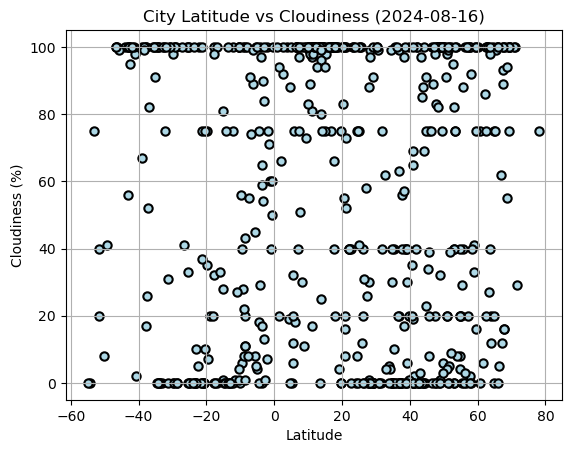

In [43]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='lightblue', edgecolors="black", linewidths=1.5)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2024-08-16)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

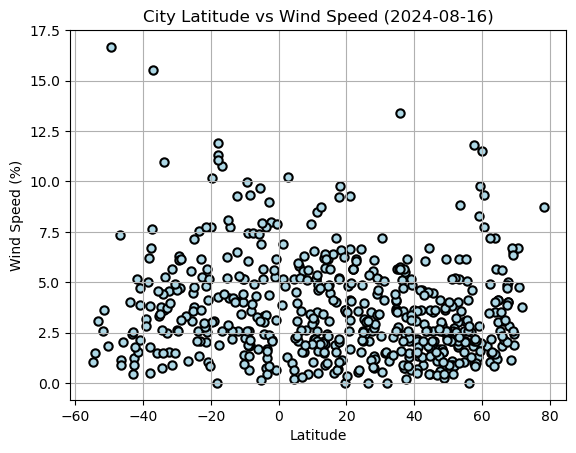

In [46]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='lightblue', edgecolors="black", linewidths=1.5)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.title("City Latitude vs Wind Speed (2024-08-16)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))


In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nemuro,43.3236,145.5750,15.17,93,97,6.03,JP,1723833697
1,thompson,55.7435,-97.8558,20.09,52,40,4.12,CA,1723833698
4,lihue,21.9789,-159.3672,26.77,80,40,5.66,US,1723833586
6,chocznia,49.8742,19.4544,23.19,78,6,0.89,PL,1723833704
8,labrador city,52.9463,-66.9114,29.54,32,40,4.02,CA,1723833707


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papao,-17.7500,-149.5500,25.82,88,100,11.92,PF,1723833699
3,waitangi,-43.9535,-176.5597,9.34,85,100,4.02,NZ,1723833700
5,port-aux-francais,-49.3500,70.2167,2.33,85,41,16.68,TF,1723833703
7,grytviken,-54.2811,-36.5092,-3.27,50,0,1.47,GS,1723833705
11,namibe,-15.1961,12.1522,17.18,85,81,5.19,AO,1723833710


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: -0.6568963659923529


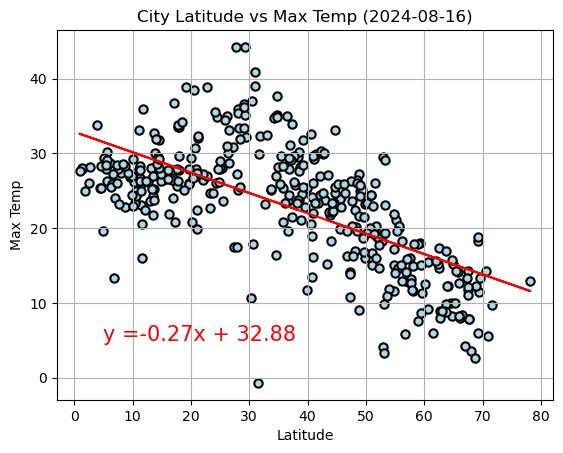

In [73]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (5,5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

The r^2 value is: 0.7823548410256206


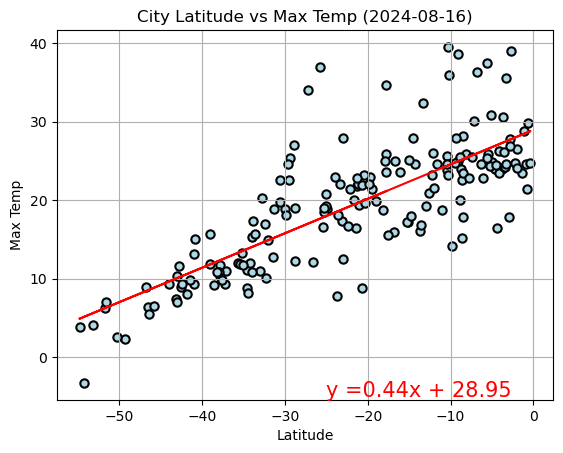

In [84]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-25,-5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: -0.005944327593753202


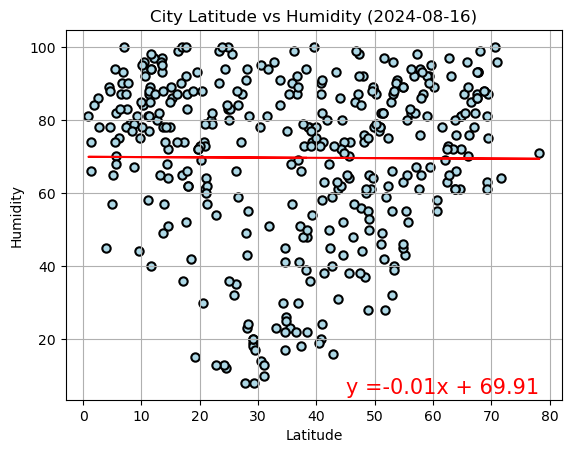

In [90]:
# Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (45, 5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

The r^2 value is: -0.14679468414552133


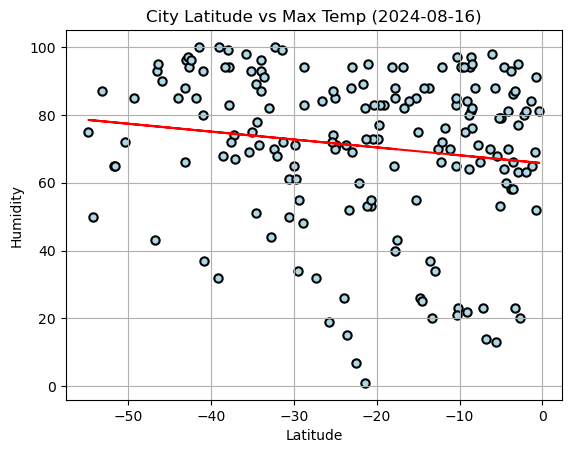

In [92]:
# Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Max Temp (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-25,-5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: -0.1374836859673322


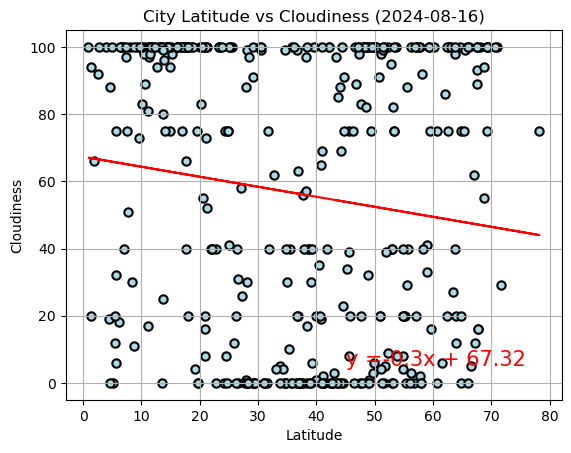

In [94]:
# Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (45, 5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

The r^2 value is: -0.16159771310147783


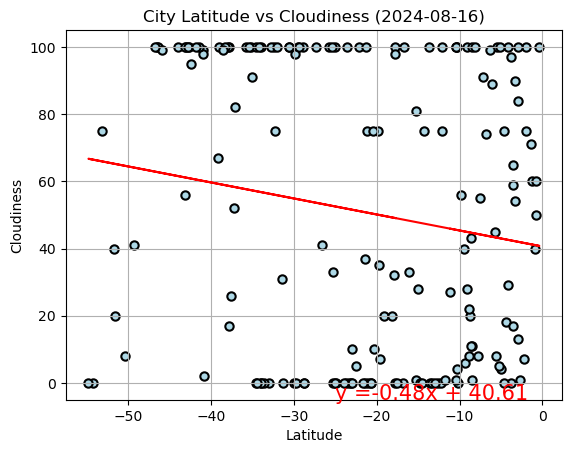

In [96]:
# Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-25,-5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: -0.056251002786250545


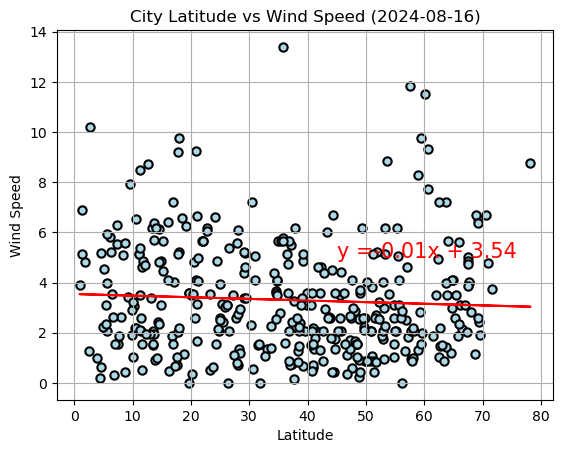

In [98]:
# Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (45, 5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

The r^2 value is: 0.07911404319168691


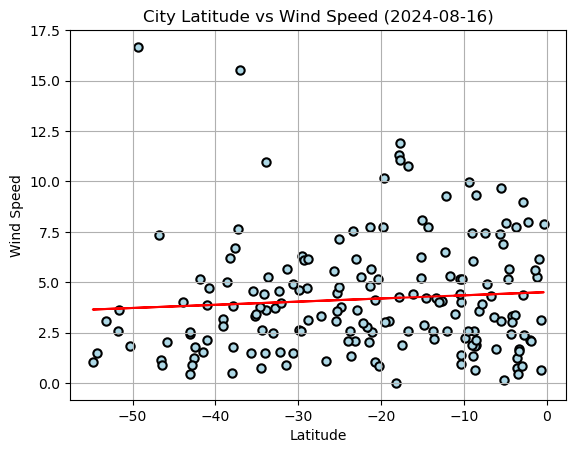

In [100]:
# Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (45, 5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

**Discussion about the linear relationship:** YOUR RESPONSE HERE